In [1]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [2]:
df = pd.read_excel('sequences_for_cm.xlsx')

In [4]:
grp = df.groupby(df['qseqid'])

In [6]:
pidentr_dict = {}

In [7]:
for name, data in grp:
    pident_r = data['pident'].max() - data['pident'].min()
    pidentr_dict[name] = pident_r

In [8]:
name_list = []
energy_list = []

In [9]:
with open('RNAalifold_results.txt', 'r') as f:
    for count, line in enumerate(f):
        if count == 0 or count % 3 == 0:
            name = line.split('/')[1].split('_seqs_')[0]
            name_list.append(name)
        if count == 2 or count % 3 == 2:
            energy = line.split('=')[0][-7:].strip()
            energy_list.append(energy)

In [11]:
edf = pd.DataFrame({'name': name_list, 'delta_G': energy_list})

In [12]:
edf

,delta_G,name
0,-18.60,c0293_EC
1,-0.32,c0343_EC
2,-44.93,Esr1_EC
3,-53.16,Esr2_EC
4,-29.69,Esr4_EC
5,-41.24,Esr5_EC
6,-11.53,Esr6_EC
7,-38.38,Esr8_EC
8,-12.80,Esr9_EC
9,-23.29,eyeA_EC


In [15]:
edf['pident_range'] = edf['name'].map(pidentr_dict)

In [16]:
edf

,delta_G,name,pident_range
0,-18.60,c0293_EC,0.000
1,-0.32,c0343_EC,25.333
2,-44.93,Esr1_EC,2.991
3,-53.16,Esr2_EC,3.191
4,-29.69,Esr4_EC,21.721
5,-41.24,Esr5_EC,7.692
6,-11.53,Esr6_EC,25.714
7,-38.38,Esr8_EC,17.931
8,-12.80,Esr9_EC,19.444
9,-23.29,eyeA_EC,2.667


In [18]:
edf[['delta_G']] = edf[['delta_G']].apply(pd.to_numeric)

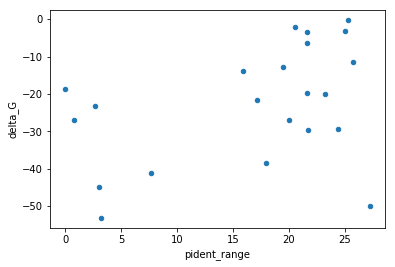

In [19]:
edf.plot(kind = 'scatter', x='pident_range', y='delta_G')